# Solar System

**Setting up the environment**
Initialization of the Ontology editor in Jupyter Notebook

In [1]:
from cognipy.ontology import Ontology #the ontology processing class
from cognipy.ontology import CQL #SPARQL format tailored for Contolled Natural Language
from cognipy.ontology import encode_string_for_graph_label #complex datatypes encoder for the graph labels in graph visualisation
import textwrap

def graph_attribute_formatter(val):
    if isinstance(val,list) or isinstance(val,set):
        return " | ".join(list(map(lambda i:encode_string_for_graph_label(graph_attribute_formatter(i)),val)))
    elif isinstance(val,dict):
        return " | ".join(list(map(lambda i:i[0]+" : "+encode_string_for_graph_label(graph_attribute_formatter(i[1])),val.items())))
    else:
        return encode_string_for_graph_label(textwrap.fill(str(val),40))

### Scraping data and building CNL

In [2]:
import pandas as pd
import os

In [3]:
if os.path.exists('orbits.pkl'):
    raw_orbit_data=pd.read_pickle('orbits.pkl')
else:
    raw_orbit_data=pd.read_html('http://nineplanets.org/data.html')[0]
    pd.to_pickle(raw_orbit_data,'orbits.pkl')

In [4]:
raw_orbit_data

,Name,#,Orbits,Distance (000 km),O_Period (days),Incl,Eccen,Discoverer,Date,A.K.A.
0,Sun,-,-,-,-,-,-,-,-,Sol (0)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercury,I,Sun,57910,87.97,7,0.21,-,-,(0)
3,Venus,II,Sun,108200,224.7,3.39,0.01,-,-,(0)
4,Earth,III,Sun,149600,365.26,0,0.02,-,-,(0)
...,...,...,...,...,...,...,...,...,...,...
92,Nereid,II,Neptune,5513,360.13,29,0.75,Kuiper,1949,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Charon,I,Pluto,20,6.39,98.8,0,Christy,1978,1978 P 1
95,Nix,II,Pluto,49,24.86,0.2,0,Stern(j),2005,2005 P 1


In [5]:
def renum(x):
    x=str(x)
    x=x.strip().replace(' ','')
    x='0'+x if x[0]=='.' else x
    x=x+'0' if x[-1]=='.' else x
    return x

In [6]:
def orbits_to_cnl(row):
    lines = []
    if row.Name==row.Name: #Nan check
        if row.Orbits!='-':
            lines.append(f"{row.Name} orbits {row.Orbits}.")
            lines.append(f"{row.Name} has-index equal-to '{row['#']}'.")
            if row['Distance (000 km)']==row['Distance (000 km)']:
                lines.append(f"{row.Name} has-semimajor-axis-1000-km equal-to {renum(row['Distance (000 km)'])}.")
            if row['O_Period (days)']==row['O_Period (days)']:
                lines.append(f"{row.Name} has-period equal-to {renum(row['O_Period (days)'])}.")
            if row['Eccen']==row['Eccen']:
                lines.append(f"{row.Name} has-eccentricity equal-to {renum(row['Eccen'])}.")
            if row.Discoverer!='-':
                lines.append(f"{row.Name} has-discoverer equal-to '{row.Discoverer.split('(')[0]}'.")
                lines.append(f"{row.Name} has-discovery-year equal-to {row.Date}.")
    return '\n'.join(lines)

In [7]:
orbit_cnl='\n'.join(line for line in raw_orbit_data.apply(orbits_to_cnl,axis=1) if line!='')
print(orbit_cnl[:1000]+"...")

Mercury orbits Sun.
Mercury has-index equal-to 'I'.
Mercury has-semimajor-axis-1000-km equal-to 57910.
Mercury has-period equal-to 87.97.
Mercury has-eccentricity equal-to 0.21.
Venus orbits Sun.
Venus has-index equal-to 'II'.
Venus has-semimajor-axis-1000-km equal-to 108200.
Venus has-period equal-to 224.7.
Venus has-eccentricity equal-to 0.01.
Earth orbits Sun.
Earth has-index equal-to 'III'.
Earth has-semimajor-axis-1000-km equal-to 149600.
Earth has-period equal-to 365.26.
Earth has-eccentricity equal-to 0.02.
Mars orbits Sun.
Mars has-index equal-to 'IV'.
Mars has-semimajor-axis-1000-km equal-to 227940.
Mars has-period equal-to 686.98.
Mars has-eccentricity equal-to 0.09.
Jupiter orbits Sun.
Jupiter has-index equal-to 'V'.
Jupiter has-semimajor-axis-1000-km equal-to 778330.
Jupiter has-period equal-to 4332.71.
Jupiter has-eccentricity equal-to 0.05.
Saturn orbits Sun.
Saturn has-index equal-to 'VI'.
Saturn has-semimajor-axis-1000-km equal-to 1429400.
Saturn has-period equal-to 107

In [8]:
if os.path.exists('physics.pkl'):
    raw_physical_data=pd.read_pickle('physics.pkl')
else:
    raw_physical_data= pd.read_html('https://nineplanets.org/physical-solar-system-data/',header=[0,1])[0]
    raw_physical_data.columns=["Name","Radius","Mass","Dens","Abo","Vo","Rotate","Dimensions"]
    pd.to_pickle(raw_physical_data,'physics.pkl')

In [9]:
raw_physical_data

,Name,Radius,Mass,Dens,Abo,Vo,Rotate,Dimensions
0,Sun,695000.0,1.99e30,1.41,?,-26,24.6,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mercury,2440.0,3.30e23,5.43,0.11,-1.9,58.6,NaN
3,Venus,6052.0,4.87e24,5.24,0.65,-4.4,-243,NaN
4,Earth,6378.0,5.97e24,5.52,0.3,-,0.99,NaN
...,...,...,...,...,...,...,...,...
81,Nereid,170.0,?,?,.2,18.7,?,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Charon,603.0,1.52e21,1.72,.32,15.5,S,(z)
84,Nix,23.0,< 2e18,?,?,22.9,?,(z)


In [10]:
def physics_to_cnl(row):
    lines = []
    if row.Name==row.Name: #Nan check
        lines.append(f"{row.Name} has-radius equal-to {renum(row.Radius)}.")
        if row.Mass!='?' and row.Mass==row.Mass:
            if row.Mass[0]=='<':
                lines.append(f"{row.Name} has-mass-kg lower-than {renum(row.Mass[1:])}.")
            else:
                lines.append(f"{row.Name} has-mass-kg equal-to {renum(row.Mass)}.")
        if row.Dens!='?' and row.Dens==row.Dens:
            lines.append(f"{row.Name} has-density equal-to {renum(row.Dens)}.")
        if row.Abo!='?':
            lines.append(f"{row.Name} has-abo equal-to {renum(row.Abo)}.")
        if row.Vo!='-' and row.Vo!='?':
            lines.append(f"{row.Name} has-vo equal-to {renum(row.Vo)}.")
        if row.Rotate!='?' and row.Rotate==row.Rotate:
            if row.Rotate=='S':
                lines.append(f"{row.Name} has-rotate equal-to 'Stable'.")
            elif row.Rotate=='chaotic':
                lines.append(f"{row.Name} has-rotate equal-to 'Chaotic'.")
            else:
                lines.append(f"{row.Name} has-rotate equal-to {renum(row.Rotate)}.")
    return '\n'.join(lines)

In [11]:
physics_cnl = '\n'.join(line for line in raw_physical_data.apply(physics_to_cnl,axis=1) if line!='')
print(physics_cnl[:1000]+"...")

Sun has-radius equal-to 695000.0.
Sun has-mass-kg equal-to 1.99e30.
Sun has-density equal-to 1.41.
Sun has-vo equal-to -26.
Sun has-rotate equal-to 24.6.
Mercury has-radius equal-to 2440.0.
Mercury has-mass-kg equal-to 3.30e23.
Mercury has-density equal-to 5.43.
Mercury has-abo equal-to 0.11.
Mercury has-vo equal-to -1.9.
Mercury has-rotate equal-to 58.6.
Venus has-radius equal-to 6052.0.
Venus has-mass-kg equal-to 4.87e24.
Venus has-density equal-to 5.24.
Venus has-abo equal-to 0.65.
Venus has-vo equal-to -4.4.
Venus has-rotate equal-to -243.
Earth has-radius equal-to 6378.0.
Earth has-mass-kg equal-to 5.97e24.
Earth has-density equal-to 5.52.
Earth has-abo equal-to 0.3.
Earth has-rotate equal-to 0.99.
Mars has-radius equal-to 3397.0.
Mars has-mass-kg equal-to 6.42e23.
Mars has-density equal-to 3.93.
Mars has-abo equal-to 0.15.
Mars has-vo equal-to -2.0.
Mars has-rotate equal-to 1.03.
Jupiter has-radius equal-to 71492.0.
Jupiter has-mass-kg equal-to 1.90e27.
Jupiter has-density equal-

### Constructing few rules that will merge all the things together

In [12]:
%%writefile solarsystem.encnl

Comment: 'Definition of a planet'.
If a thing orbits a star and the thing has-mass-kg greater-than 1.0e23 then the thing is a planet.

Comment: 'Definition of a dwarf-planet'.
If a thing orbits a star and the thing has-mass-kg greater-than 1.0e21 and the thing has-mass-kg lower-than 1.0e23 then the thing is a dwarf-planet.

Comment: 'Definition of the moon'.
If a thing(1) orbits a thing(2) and the thing(2) orbits a star then the thing(1) is a moon.

Comment: 'All starts with the Sun'.
Sun is a star.


Overwriting solarsystem.encnl


### Loading the ontology

In [13]:
onto=Ontology("cnl/string",'\n'.join([open("solarsystem.encnl","rt").read(), physics_cnl,orbit_cnl]), 
                    evaluator = lambda e:eval(e,globals(),locals()), 
                    graph_attribute_formatter = graph_attribute_formatter)

### Exploring the ontology

In [14]:
onto.select_instances_of("a star")

,Instance,has-rotate,has-vo,has-density,has-mass-kg,has-radius
0,Sun,24.6,-26,1.41,1.990000e+30,695000.0


In [15]:
onto.select_instances_of("a dwarf-planet")

,Instance,orbits,has-discovery-year,has-mass-kg,has-vo,has-abo,has-discoverer,has-rotate,has-radius,has-period,has-semimajor-axis-1000-km,has-eccentricity,has-index,has-density
0,Pluto,Sun,1930,1.270000e+22,13.6,0.55,Tombaugh,-6.39,1150.0,90550,5913520,0.25,IX,2.06


In [16]:
onto.select_instances_of("a planet")

,Instance,orbits,has-discoverer,has-abo,has-vo,has-density,has-semimajor-axis-1000-km,has-discovery-year,has-period,has-eccentricity,has-radius,has-mass-kg,has-rotate,has-index
0,Neptune,Sun,Adams,0.41,7.8,1.64,4504300,1846.0,60190.00,0.01,24766.0,1.020000e+26,0.67,VIII
1,Saturn,Sun,None,0.47,0.7,0.69,1429400,NaN,10759.50,0.06,60268.0,5.680000e+26,0.45,VI
2,Mars,Sun,None,0.15,-2.0,3.93,227940,NaN,686.98,0.09,3397.0,6.420000e+23,1.03,IV
3,Earth,Sun,None,0.30,NaN,5.52,149600,NaN,365.26,0.02,6378.0,5.970000e+24,0.99,III
4,Venus,Sun,None,0.65,-4.4,5.24,108200,NaN,224.70,0.01,6052.0,4.870000e+24,-243.00,II
5,Uranus,Sun,Herschel,0.51,5.5,1.32,2870990,1781.0,30685.00,0.05,25559.0,8.680000e+25,-0.72,VII
6,Mercury,Sun,None,0.11,-1.9,5.43,57910,NaN,87.97,0.21,2440.0,3.300000e+23,58.60,I
7,Jupiter,Sun,None,0.52,-2.7,1.33,778330,NaN,4332.71,0.05,71492.0,1.900000e+27,0.41,V


In [17]:
onto.select_instances_of("a moon that orbits Jupiter")

,Instance,orbits,has-radius,has-semimajor-axis-1000-km,has-index,has-density,has-period,has-vo,has-discovery-year,has-discoverer,has-eccentricity,has-mass-kg,has-rotate,has-abo
0,Carme,Jupiter,20.0,22600,XI,2.80,-692.00,17.9,1938,Nicholson,0.21,9.560000e+16,None,NaN
1,Harpalyke,Jupiter,NaN,21132,XXII,NaN,NaN,NaN,2000,Sheppard,NaN,NaN,None,NaN
2,Megaclite,Jupiter,NaN,23911,XIX,NaN,NaN,NaN,2000,Sheppard,NaN,NaN,None,NaN
3,Callirrhoe,Jupiter,NaN,24100,XVII,NaN,NaN,NaN,2000,Sheppard,NaN,NaN,None,NaN
4,Io,Jupiter,1821.0,422,I,3.53,1.77,5.0,1610,Galileo,0.00,8.930000e+22,Stable,0.61
5,Thebe,Jupiter,50.0,222,XIV,1.50,0.67,16.0,1979,Synnott,0.02,7.770000e+17,Stable,0.05
6,Amalthea,Jupiter,94.0,181,V,1.00,0.50,14.1,1892,Barnard,0.00,3.500000e+18,Stable,0.05
7,Elara,Jupiter,38.0,11737,VII,3.30,259.65,16.6,1905,Perrine,0.21,7.770000e+17,0.5,NaN
8,Chaldene,Jupiter,NaN,23387,XXI,NaN,NaN,NaN,2000,Sheppard,NaN,NaN,None,NaN
9,Lysithea,Jupiter,18.0,11720,X,3.10,259.22,18.2,1938,Nicholson,0.11,7.770000e+16,None,NaN


### Draw the ontology

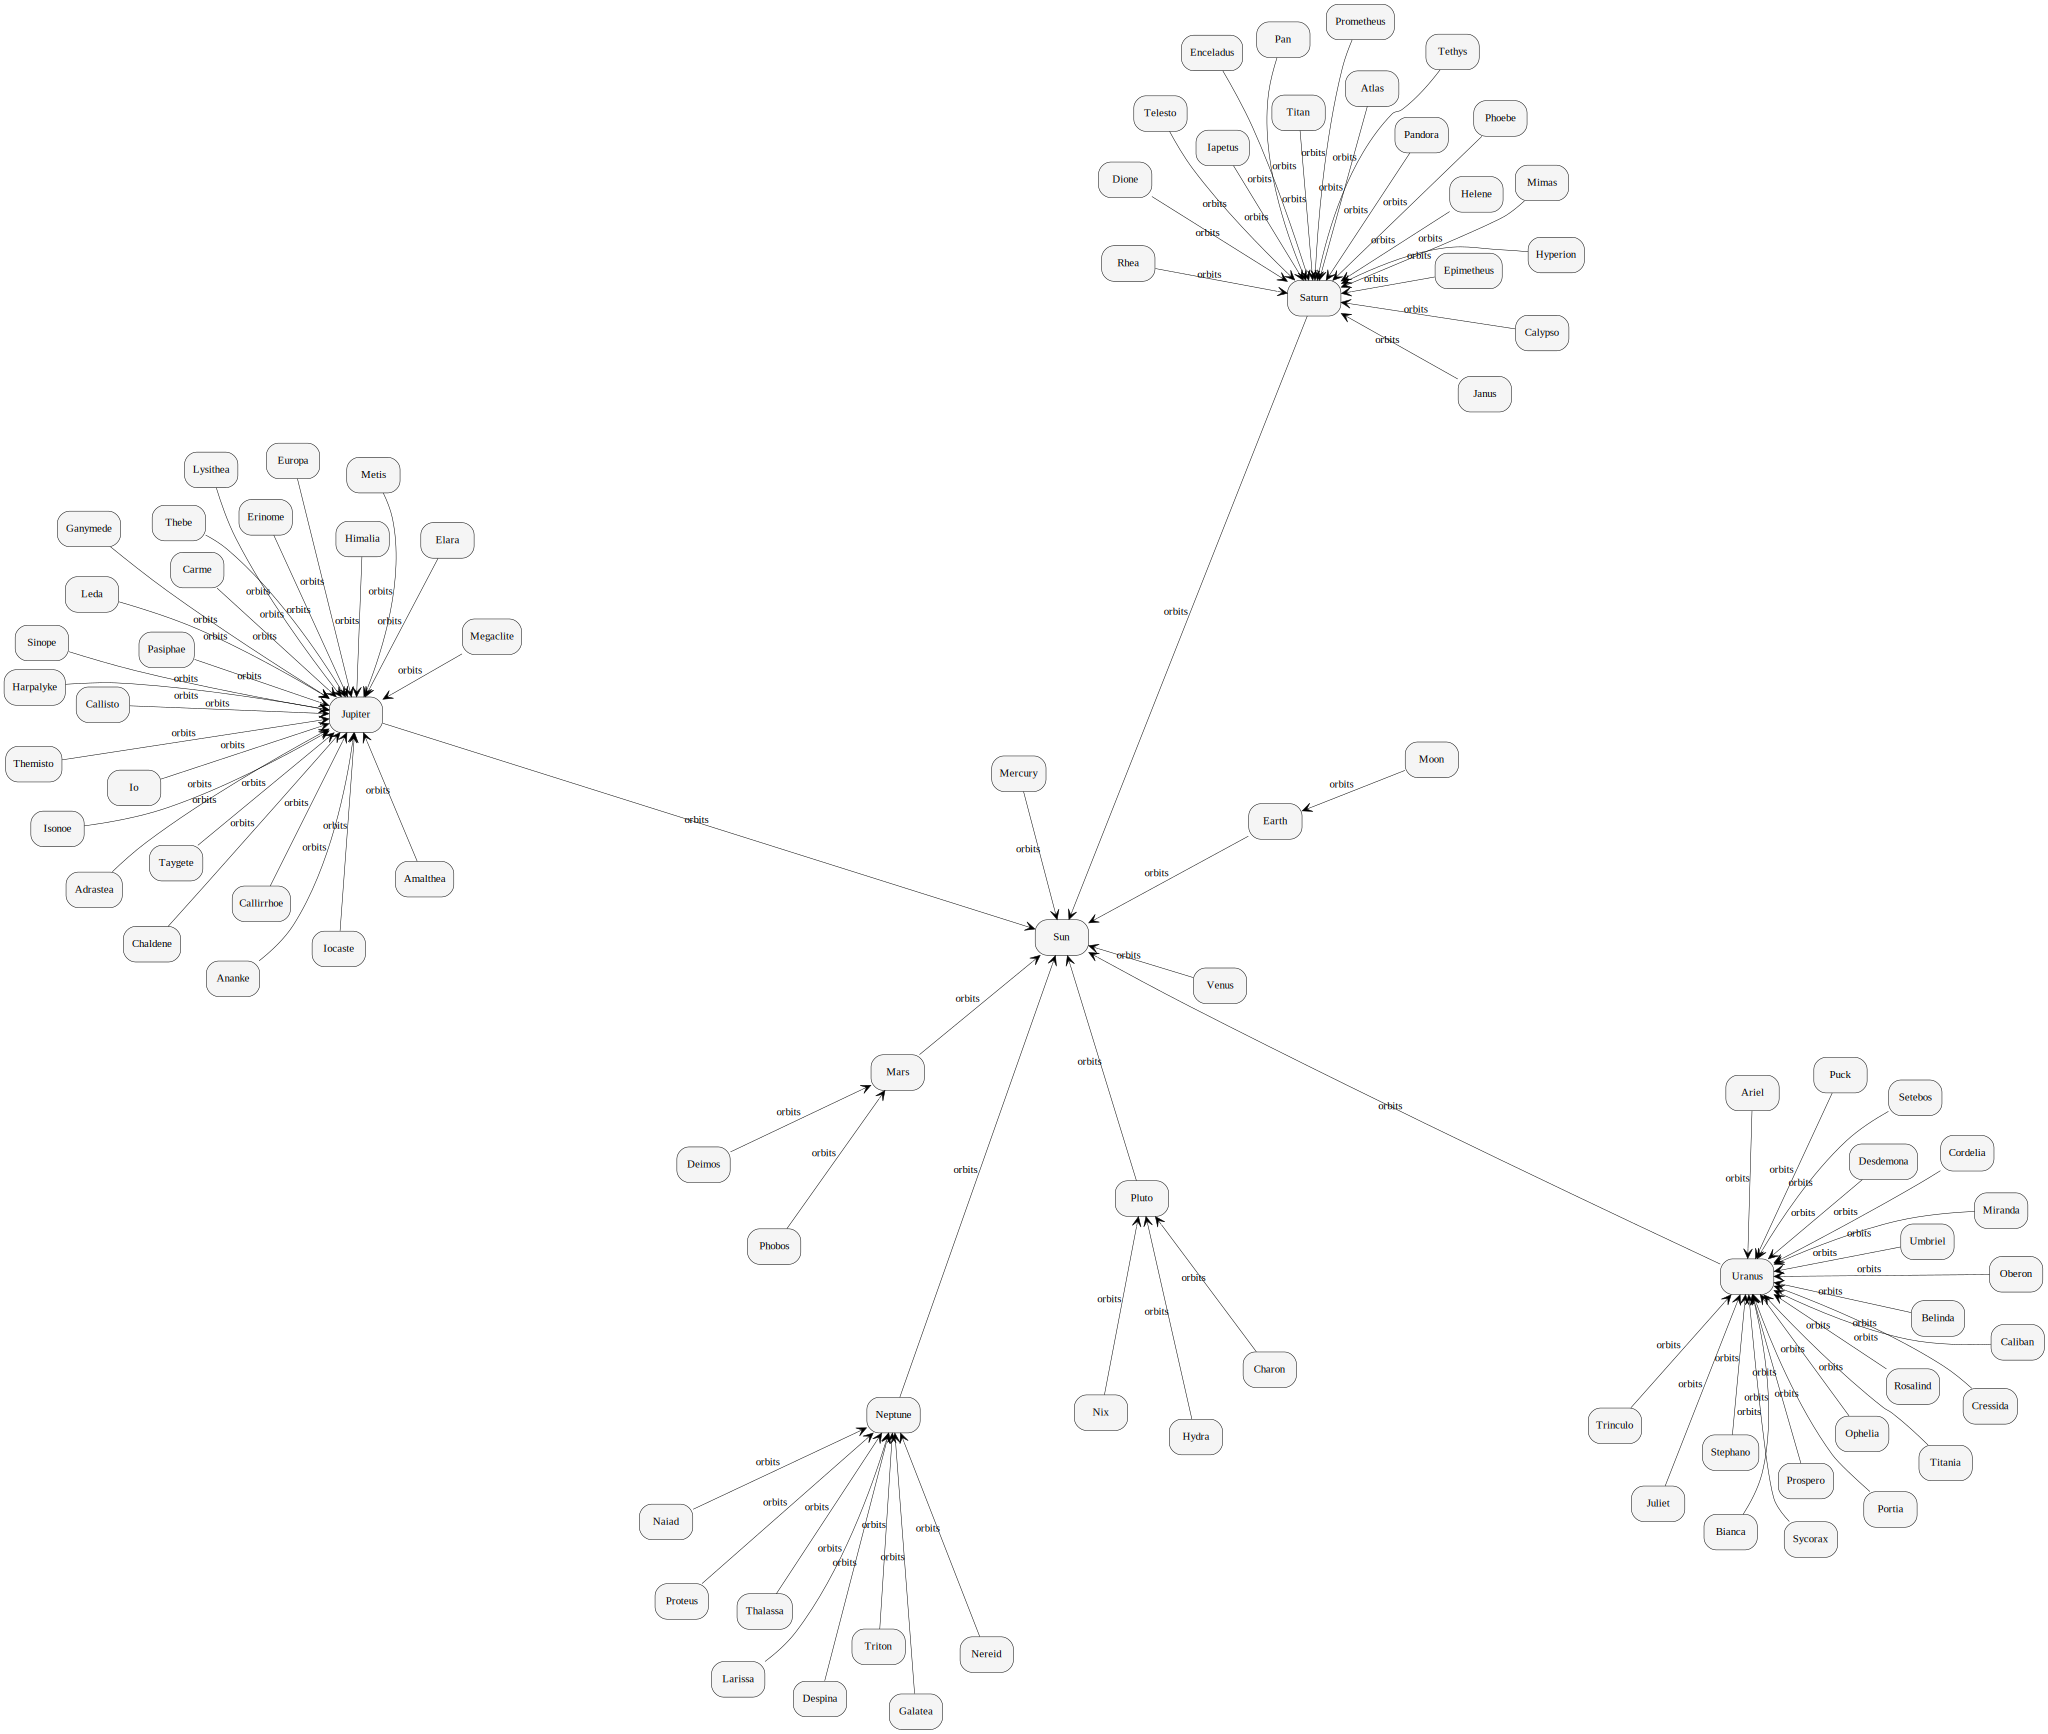

In [18]:
onto.draw_graph(layout='force directed',show={"relations"})